# 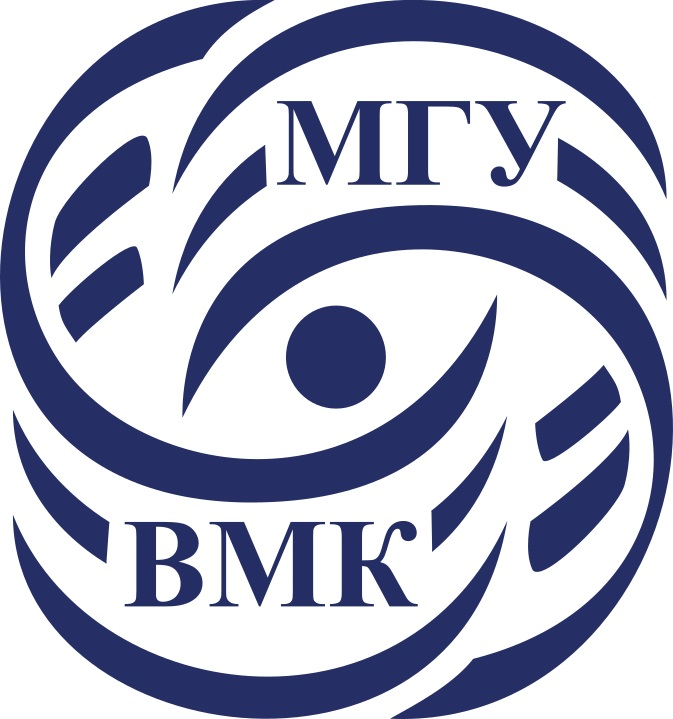

# Машинное обучение. ВМК МГУ

# Практическое задание 2. Knn: классификация и регрессия

## Уровень: <font color='MediumSeaGreen'>**Исследовательский (Research)**</font>

# О формате сдачи

🔷 **<font color='plum'>При решении ноутбука используйте данный шаблон</font>**

    ✅ Можно добавлять новые ячейки любых типов
    ❌ Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий


🔷 **<font color='plum'>При оценивании задач учитывается код</font>**

    ✅ Задания, в которых необходим код, обычно помечаются фразами "Your code here"/"Ваш код" и аналогичными
    ❌ Ответы на вопросы без сопутствующего кода оцениваются в 0 баллов
    ❌ Наличе работоспособного кода в ноутбуке, если на сказано иного, обязательно

🔷 **<font color='plum'>При оценивании задач учитываются выводы</font>**

    ✅ Задания, в которых необходимы выводы, обычно помечаются фразами Вывод"/"Ответ на вопрос"/"Ваш текст" и аналогичными
    ✅ Обычно выводы подразумевают под собой текстовый ответ (можно писать markdown, latex).
    ✅ Сопутствующие изображения, графики, таблички - приветствуются!
    ❌ При отсутствии выводов задание не засчитается на полный балл

-----------
<font color="white" style="opacity:0.2024"></font>







<font color=DarkOrange>**Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука при правильной реализации: 10 минут </font>**

# Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

<font color='OrangeRed'>**Важно!**</font>

Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

<font color='OrangeRed'>**Важно!**</font>
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то проверьте, что вы установили рабочее окружение в [соответствии с гайдом](https://github.com/MSU-ML-COURSE/ML-COURSE-24-25/blob/main/tutorials/%D0%A2%D1%83%D1%82%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%20%D0%BF%D0%BE%20%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B5%20%D1%80%D0%B0%D0%B1%D0%BE%D1%87%D0%B5%D0%B3%D0%BE%20%D0%BE%D0%BA%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B2%20Python%20%D0%B4%D0%BB%D1%8F%20%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%20(2).pdf)

In [111]:
# # !!! Данный блок будет работать только в Google-Colab !!!
# ! gdown 10k8Hwn9kpK9SpK4IEj4-EaWQZqgYT5-Q
# ! pip install -r /content/requirements_2024_25_for_colab_small.txt

Проверим версию библиотеки:

In [112]:
import catboost
assert(catboost.__version__ == '1.2.7')


<font color='OrangeRed'>**Внимание!**</font> Перед выполнение данного задания рекомендуем сначала погрузиться в [Base] ноутбук по основам sklearn, нормализации и кросс-валидации, так как данные техники и понятия будут активно использоваться в данном ноутбук

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2024"></font>

# Часть 1. Нормализация признакового пространства

В данном части задания исследуем, как нормализация (скейлинг) данных влияет на разделимость данных

In [113]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [114]:
import numpy as np
import seaborn as sns
import pickle

from matplotlib import pyplot as plt


plt.rcParams["figure.figsize"] = (5,5)

Загрузим файл с данными data.pkl:

In [115]:
!gdown 1acbP4PNmu11rkBzozvIc3bowWaQL7iFe

Downloading...
From: https://drive.google.com/uc?id=1acbP4PNmu11rkBzozvIc3bowWaQL7iFe
To: /home/andrey/Desktop/mmo/ht_3/research/data.pkl
100%|██████████████████████████████████████| 5.03k/5.03k [00:00<00:00, 44.6MB/s]


Загрузим данные в память. В переменной $X$ будут храниться признаковые описания объектов, в переменной $y~-$ метки классов

In [116]:
with open('data.pkl', 'rb') as file:
    X, y = pickle.load(file)

In [117]:
def plot_data_points(X, labels, xlim, ylim):
    g = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels)
    g.set(xlim=xlim, ylim=ylim)
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.grid()

Визуализируем наши данные

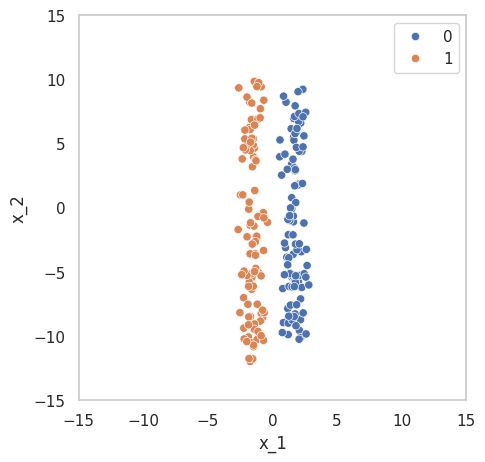

In [118]:
plot_data_points(X, y, xlim=(-15, 15), ylim=(-15, 15))

Как видно, наши данные идеально разделяются прямой $x=0$

Функция $plot\_knn\_bound$ принимает на вход объекты $X$, метки классов $y$, метод нормализации признаков $scaler$, число соседей $n\_neighbors$ и границы рисунка $xlim$, $ylim$. Функция обучает $KNN$ классификатор с числом соседей $n\_neighbors$ и визуализирует разделяющую поверхность для классов, полученную с помощью обученного $KNN$ классификатора.

* Если вы не можете различить _выбранные нами цвета_, то измените список цветов в переменных cmap_light и cmap_bold. Актуальный список возможных цветов находится [здесь](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

In [119]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

def plot_knn_bound(X, y, scaler=None, n_neighbors=10, xlim=(-15, 15), ylim=(-20, 20)):
    # step size in the mesh
    h = 0.05

    # Create color maps
    cmap_light = ListedColormap(['C0', 'orange', 'cyan', 'green'][:np.unique(y).shape[0]])
    cmap_bold = ['C0', 'orange', 'c', 'darkgreen'][:np.unique(y).shape[0]]

    x_min, x_max = xlim
    y_min, y_max = ylim
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]

    X_scaled = X # if scaler is None
    if scaler is not None:
        grid = scaler.transform(grid)
        X_scaled = scaler.transform(X)

    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, algorithm='brute')
    clf.fit(X_scaled, y)

    Z = clf.predict(grid)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y,
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.title('Разделющие поверхности алгоритма {}-NN'.format(n_neighbors))
    plt.grid()
    plt.show()

Нарисуем разделющие поверхности $1$-$NN$ и $10$-$NN$

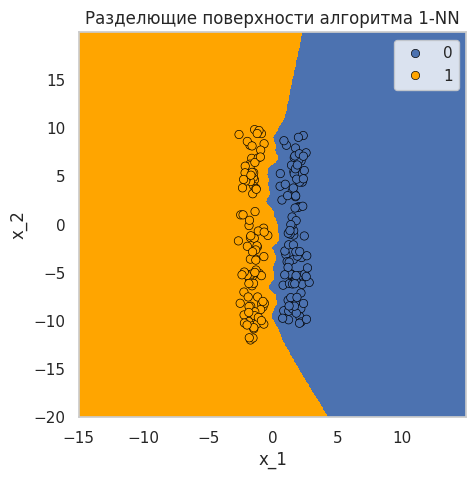

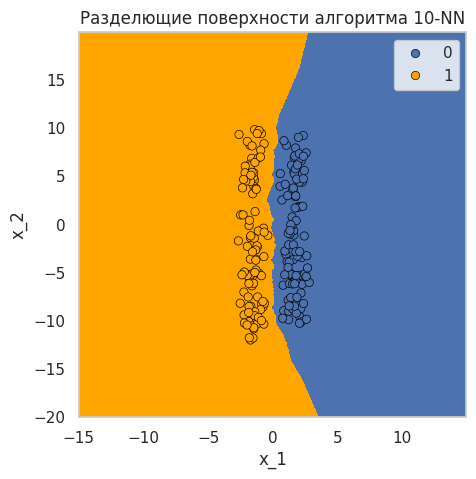

In [120]:
plot_knn_bound(X, y, n_neighbors=1)
plot_knn_bound(X, y, n_neighbors=10)

## <font color='DarkOrange'>**Задание 1.1 (кросс-проверка, 1,5 балла)**</font>

 Объясните, почему наблюдается сильное отклоенние разделяющей поверхности от прямой $x_1=0$ при значениях $x_2 < -10$ и $x_2 > 10$. Дайте <font color='OrangeRed'>**строгое математическое обоснование**</font> наблюдаемого явления, показывающее, что в Евклидовом пространстве данная проблема решается нормализацией (скейлингом) признаков.

<font color='MediumOrchid'>**Ваше обоснование тут, можно использовать LaTeX:**</font>

Алгоритм $k$-ближайших соседей (KNN) основывается на эвклидовой метрике расстояний между точками. В случае, когда признаки $x_1$ и $x_2$ находятся в разных масштабах (например, один из них имеет диапазон от -20 до 20, а другой — от -5 до 5), метрика Евклида будет преимущественно учитывать признак с наибольшим диапазоном значений. В этом случае признак $x_2$ имеет больший диапазон, чем $x_1$, и это вызывает смещение разделяющей поверхности, так как для KNN большие значения признака $x_2$ могут доминировать над вкладом $x_1$.

В Евклидовой метрике расстояние между двумя точками $A(x_1^A, x_2^A)$ и $B(x_1^B, x_2^B)$ вычисляется по формуле:

$
d(A, B) = \sqrt{(x_1^A - x_1^B)^2 + (x_2^A - x_2^B)^2}
$

Если значения $x_2$ варьируются в гораздо более широких пределах, чем значения $x_1$, разница в $(x_2^A - x_2^B)^2$ будет значительно больше, чем $(x_1^A - x_1^B)^2$, и таким образом вклад второго признака будет доминировать в общей сумме. Это приводит к тому, что разделяющая поверхность "сдвигается" в сторону $x_2$, создавая асимметрию в принятии решений.


---

## <font color='DarkOrange'>**Задание 1.2 (кросс-проверка, 2 балла)**</font>


 Пусть дано произвольное число точек на плоскости. Представим, что каждая точка - это отдельный класс. Пусть на данной выборке был обучен $1-NN$ классификатор. Чем с геометрической точки зрения являются разделяющие поверхности этого классификатора? Требуется <font color='OrangeRed'>**математически строго, однозначно и с полным обоснованием**</font> определить геометрическое место точек разделяющих поверхностей.

В качестве примера ниже представлена визуализация для четырех точек

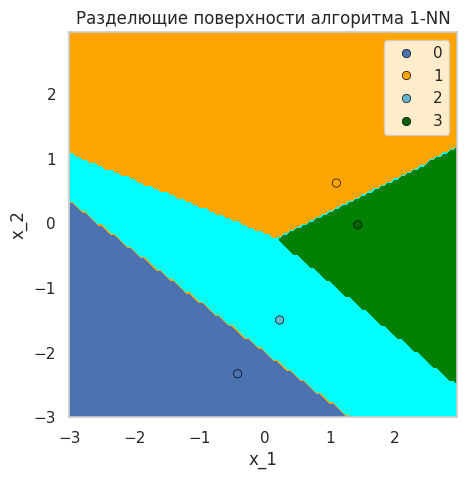

In [121]:
X = np.random.randn(4, 2)
y = np.arange(4)
plot_knn_bound(X, y, n_neighbors=1, xlim=(-3, 3), ylim=(-3, 3))

<font color='MediumOrchid'>**Ваше обоснование тут, можно использовать LaTeX:**</font>

Если точки $A(x_1^A, x_2^A)$ и $B(x_1^B, x_2^B)$ принадлежат разным классам, то уравнение разделяющей поверхности можно записать как:

$
d((x_1, x_2), A) = d((x_1, x_2), B)
$

где $d((x_1, x_2), A)$ — это Евклидово расстояние между новой точкой $(x_1, x_2)$ и точкой A, и аналогично для точки B. Развернув это выражение, получаем:

$
\sqrt{(x_1 - x_1^A)^2 + (x_2 - x_2^A)^2} = \sqrt{(x_1 - x_1^B)^2 + (x_2 - x_2^B)^2}
$

Упрощая это уравнение, получаем уравнение прямой, которая является разделяющей поверхностью для этих двух точек.

# Часть 2. Кросс-валидация

Чтобы закрепить понимание устройства кросс-валидации предлагаем вам запрограммировать данный метод самостоятельно

## <font color='DarkOrange'>**Задание 2.1 (unit-tests, 3 балла)**</font>

 В модуле `cross_val.py` реализуйте функции

* $kfold\_split$, которая реализует генерацию индексов обучающей и валидационной выборок для кросс-валидации
* $knn\_cv\_score$, которая реализует кросс-валидацию для $KNN-$модели
   
Примеры запусков функций можно увидеть в открытых тестах.

----

# Часть 3. Работа с текстовыми данными

Далее будем решать задачу классификации новостного текста к одному из 20 классов, каждый класс соответствует определенной новостной тематике.

- В качестве метрики качества будем использовать $accuracy\_score$.

<font color='CornflowerBlue'>**Accuracy**</font> - это доля верно классифицированных объектов, среди всех объектов выборки.

In [122]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [123]:
X_train, y_train = fetch_20newsgroups(subset='train', return_X_y=True, random_state=42)
X_test, y_test = fetch_20newsgroups(subset='test', return_X_y=True, random_state=42)

In [124]:
print(X_train[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [125]:
X_train = np.array(X_train, dtype=object)

In [126]:
X_test = np.array(X_test, dtype=object)

In [127]:
y_train = np.array(y_train)
y_test = np.array(y_test)

Как мы видим, объектами обучающей выборки являются тексты. Сырые текстовые данные не могут служить обучающими примерами для алгоритма $KNN$. Перед использованием $KNN$ текстовые данные переменной длины необходимо отобразить в числовой вектор фиксированной размерности.

Работа с текстовыми данными проходит в несколько этапов.

* <font color='plum'>**Токенизация.**</font> Текстовая строка делится на токены. Как правило, в качестве токенов выступают отдельные слова и знаки препинания.

* <font color='plum'>**Нормализация.**</font> Приведение к нижнему регистру, удаление стоп-слов, удаление пунктуации, удаление редких и частотных слов и т.д.

* <font color='plum'>**Векторизация.**</font> Фиксируется словарь токенов $V$ по **обучающей** выборке. Текст представлется в виде вектора длиной $|V|$, где каждый признак есть функция от частоты встречаемости токена в тексте и в обучающей выборке.

В данном задании будет использовано два вида векторизации.

* Первый, $CountVectorizer$, сопоставляет каждому токену частоту встречаемости этого токена в тексте документа.

*  Второй, $TfidfVectorizer$, сопоставляет каждому токену частоту встречаемости этого токена в тексте документа умноженную на величину обратно пропорциональную частоте встречаемости токена во всех документах **обучающей** выборки. Подробне про $tf-idf$ предлагаем изучить самостоятельно, например, [здесь](https://ru.wikipedia.org/wiki/TF-IDF).

<font color='MediumTurquoise'>**Полезные ссылки**</font>

Более подробно про работу с текстами можно прочитать в [статье](https://habr.com/ru/companies/otus/articles/687796/) на Хабре и в [NLTK Book](https://www.nltk.org/book/).

В `sklearn` все векторизаторы автоматически токенизируют текст и приводят его к нижнему регистру. Параметры $max\_df$ и $min\_df$ позволяют убрать из словаря наиболее частые и наиболее редкие токены. Параметр $stop\_words$ позволяет убрать из словаря стоп-слова (малоинформативные слова для данного языка, например, союзы).

In [128]:
count_vec = CountVectorizer(max_df=0.8, min_df=10, max_features=1000, stop_words='english')
tf_idf = TfidfVectorizer(max_df=0.8, min_df=10, max_features=1000, stop_words='english')

## <font color='DarkOrange'>**Задание 3.1 (кросс-проверка, 0,5 баллa)**</font>

 Найдите оптимальные параметры обучения модели. Осуществлять перебор параметров следует по заданной ниже сетке.

 - Используйте реализованные вами функции $kfold\_split$, $knn\_cv\_score$. В качестве метрики используйте $accuracy\_score$. 3х фолдов для кросс-валидации будет достаточно.

In [129]:
from sklearn.metrics import accuracy_score

parameters = {
    'n_neighbors': [i for i in range(1, 11)],
    'metrics': ['cosine'],
    'weights': ['uniform', 'distance'],
    'normalizers': [(count_vec, 'CountVectorizer'), (tf_idf, 'TfidfVectorizer')]
}

Если вы все сделаете правильно, то запущенная вами кросс-валидация будет работать примерно 7 минут. Дождитесь ее завершения, не закрывайте и не перезагружайте этот colab ноутбук.

In [130]:
from cross_val import kfold_split, knn_cv_score

folds = kfold_split(X_train.shape[0], 3)
out = knn_cv_score(X_train, y_train, parameters, accuracy_score, folds, neighbors.KNeighborsClassifier)
out

{('CountVectorizer', 1, 'cosine', 'uniform'): 0.672529557349117,
 ('CountVectorizer', 1, 'cosine', 'distance'): 0.672529557349117,
 ('CountVectorizer', 2, 'cosine', 'uniform'): 0.6107487946139536,
 ('CountVectorizer', 2, 'cosine', 'distance'): 0.6727063451154036,
 ('CountVectorizer', 3, 'cosine', 'uniform'): 0.6175544908920086,
 ('CountVectorizer', 3, 'cosine', 'distance'): 0.6681107302581447,
 ('CountVectorizer', 4, 'cosine', 'uniform'): 0.6155215721850416,
 ('CountVectorizer', 4, 'cosine', 'distance'): 0.6672269554662617,
 ('CountVectorizer', 5, 'cosine', 'uniform'): 0.6182611498385054,
 ('CountVectorizer', 5, 'cosine', 'distance'): 0.6640445178966681,
 ('CountVectorizer', 6, 'cosine', 'uniform'): 0.6143717486775366,
 ('CountVectorizer', 6, 'cosine', 'distance'): 0.6598905678102472,
 ('CountVectorizer', 7, 'cosine', 'uniform'): 0.6128692167036506,
 ('CountVectorizer', 7, 'cosine', 'distance'): 0.6562666529435867,
 ('CountVectorizer', 8, 'cosine', 'uniform'): 0.6040307657581782,
 ('Co

## <font color='DarkOrange'>**Задание 3.2 (кросс-проверка, 0,5 балл)**</font>

 Какой метод предобработки данных в среднем дает наилучший результат? Почему?

In [131]:
count_scores = np.array([out[key] for key in out if key[0] == 'CountVectorizer'])
print(f'CountVectorizer scores: {count_scores}\n')

tfidf_scores = np.array([out[key] for key in out if key[0] == 'TfidfVectorizer'])
print(f'TfidfVectorizer scores: {tfidf_scores}\n')

count_mean = np.mean(count_scores)
tfidf_mean = np.mean(tfidf_scores)

print(f'CountVectorizer mean: {count_mean}')
print(f'TfidfVectorizer mean: {tfidf_mean}')

CountVectorizer scores: [0.67252956 0.67252956 0.61074879 0.67270635 0.61755449 0.66811073
 0.61552157 0.66722696 0.61826115 0.66404452 0.61437175 0.65989057
 0.61286922 0.65626665 0.60403077 0.65202436 0.60456092 0.64866572
 0.60049534 0.64557226]

TfidfVectorizer scores: [0.69400648 0.69400648 0.63496577 0.69400648 0.64141779 0.69250442
 0.64309725 0.69020681 0.64071097 0.68304763 0.64053437 0.68384318
 0.63956192 0.67915865 0.6347008  0.67473933 0.631254   0.67350227
 0.62789508 0.66943659]

CountVectorizer mean: 0.6388990605126902
TfidfVectorizer mean: 0.6631298134476623


<font color='MediumOrchid'>**Ваш ответ тут:**</font>

В среднем лучший результат даёт TfidfVectorizer, потому что этот вид вукторизации учитывает не тольок частоту встречаемости слова в каком-то документе, но и во всей выборке текстов. Это даёт лучшее представление о значимости конкретных слов для некоторых классов.

## <font color='DarkOrange'>**Задание 3.3 (кросс-проверка, 1 балл)**</font>

 Начертите график (line plot) зависимости метрики качества от числа соседей. Метрику следует усреднить по всем параметрам, кроме числа соседей. Сделайте выводы о наблюдаемых зависимостях (возможно будет полезным ознакомиться с названиями классов)

        Vectorizer  n_neighbors  metric   weights  accuracy
0  CountVectorizer            1  cosine   uniform  0.672530
1  CountVectorizer            1  cosine  distance  0.672530
2  CountVectorizer            2  cosine   uniform  0.610749
3  CountVectorizer            2  cosine  distance  0.672706
4  CountVectorizer            3  cosine   uniform  0.617554


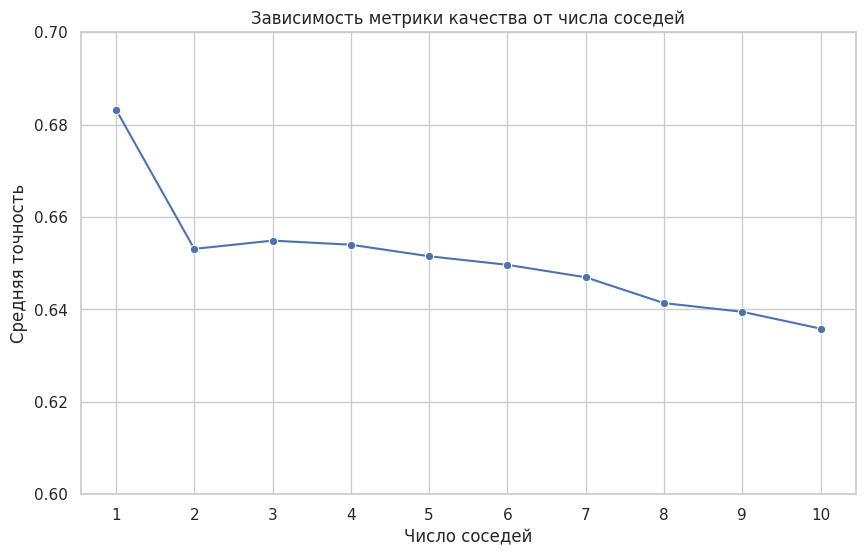

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.DataFrame([
    {'Vectorizer': key[0],
     'n_neighbors': key[1],
     'metric': key[2],
     'weights': key[3],
     'accuracy': value}
    for key, value in out.items()
])

print(data.head())

avg_accuracy = data.groupby('n_neighbors')['accuracy'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_accuracy, x='n_neighbors', y='accuracy', marker='o')
plt.title('Зависимость метрики качества от числа соседей')
plt.xlabel('Число соседей')
plt.ylabel('Средняя точность')
plt.xticks(avg_accuracy['n_neighbors'])
plt.ylim(0.60, 0.7)
plt.show()

<font color='MediumOrchid'>**Ваш ответ тут:**</font>

Лучшие результаты достигаются при числе соседей равном 1. При числе соседей равном 2 видно резкое ухудшение качества классификации. Затем качество немного улучшается при числе соседей 3, а затем постепенно ухудшается.

Из этого следует, что, чем больший контекст слова мы рассматриваем (этому соответствует большее число соседей), тем хуже классифицируются тексты.

## <font color='DarkOrange'>**Задание 3.4 (кросс-проверка, 1,5 баллa)**</font>

 Оцените точность вашей лучшей модели на тестовой части датасета. Отличается ли оно от качества, полученного на кросс-валидации? Почему? При ответе на поставленные вопросы вам поможет анализ распределений обучающей и тестовой выборок

In [133]:
from sklearn.pipeline import Pipeline

best_val = sorted(out.values(), reverse=True)[0]

for key in out.keys():
    if out[key] == best_val:
        break
print(f'Best model: {key, best_val}')

pipeline = Pipeline([
    ('normalizer=', tf_idf),
    ('classifier', neighbors.KNeighborsClassifier(n_neighbors=1, metric='cosine', weights='uniform'))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

score = accuracy_score(y_test, y_pred)
print(f'Best model test score: {score}')

Best model: (('TfidfVectorizer', 1, 'cosine', 'uniform'), 0.6940064822805884)
Best model test score: 0.5312002124269782


<font color='MediumOrchid'>**Ваш ответ тут:**</font>

Точность лучшей модели на тестовой выборке составляет всего примерно 0.53 против 0.69 на кросс-валидации. Это происходит из-за вычисления векторов с помощью tf-idf. Этот метод вычисляет вектора слов только для тестовой выборке, основываясь на встречаемости слов в документах этой выборки и их частоте. Но к тестовой выборке этот метод не имеет доступ. Так как кросс-валидация проводилась на тренировочной выборке, у всех слов были корректные векторные представления, поэтому модель показывала хорошую точность. Когда модель стала работать на тестовой выборке, ей могли встретиться новые слова, не имеющие векторов, сами слова могли встречаться чаще или реже, имеющиеся векторные представления в этом случае становятся не совсем корректными. Поэтому точность модели и упала.

# <font color='MediumSeaGreen'>**Бонус [0,5 балла]**</font>

 Вставьте мем, описывающий ваше состоянии после решения данного ноутбука

Ваша картинка тут

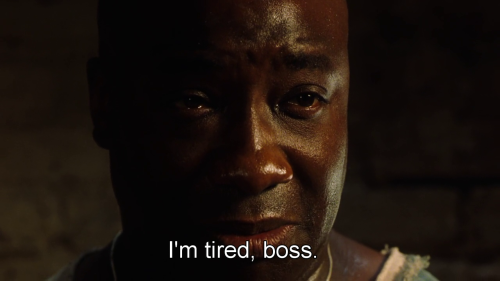